### Simple script here for checking how we divide up the KaRIn Swaths

5
30
39
64


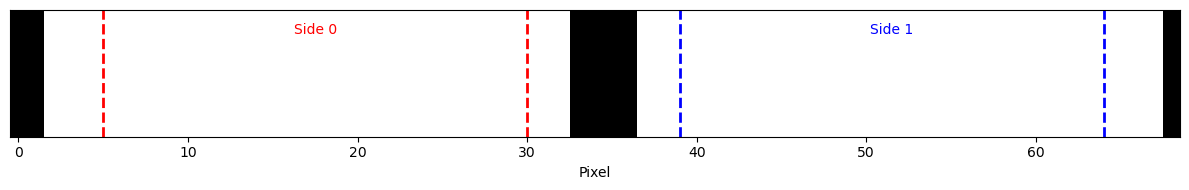

In [3]:
import numpy as np
import matplotlib.pyplot as plt

raw = np.array([ # pase in a row of the SWOT data
    np.nan, np.nan,
    0.7631, 0.8258, 0.8324, 0.8005, 0.7816, 0.7619, 0.7369, 0.7189,
    0.685, 0.6583, 0.6341, 0.6118, 0.5821, 0.5498, 0.5295, 0.5102,
    0.489, 0.4634, 0.4322, 0.4096, 0.3817, 0.3591, 0.3449, 0.3206,
    0.2858, 0.259, 0.2348, 0.2093, 0.1866, 0.1649, 0.1549,
    np.nan, np.nan, np.nan, np.nan,
    0.0135, -0.0143, -0.0467, -0.0637, -0.0785, -0.1072, -0.1295, -0.158,
    -0.1759, -0.1901, -0.2177, -0.2456, -0.2763, -0.3091, -0.3352,
    -0.3547, -0.3684, -0.3907, -0.4187, -0.4471, -0.4651, -0.4920,
    -0.5273, -0.5638, -0.6055, -0.6394, -0.6646, -0.6699, -0.683,
    -0.7015, -0.6975,
    np.nan
])

mask = np.where(np.isfinite(raw), 0, 1)

# --- swath geometry to visualize ---
swath_width  = 25
middle_width = 10
file_start_idx = 5
stride = swath_width + middle_width

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 2))

# Plot mask as a bar (0/1)
ax.imshow(mask[np.newaxis, :], cmap='gray_r', aspect='auto')

# Draw boundaries for side 0 and side 1
for side, color in zip([0,1], ['red','blue']):
    i0 = 34 * side + 5
    i1 = i0 + swath_width
    print(i0)
    print(i1)

    ax.axvline(i0, color=color, linestyle='--', lw=2)
    ax.axvline(i1, color=color, linestyle='--', lw=2)
    ax.text((i0+i1)/2, -0.4, f"Side {side}", color=color,
            ha='center', va='top', fontsize=10)

ax.set_yticks([])
ax.set_xlabel("Pixel")
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ---- KaRIn full grid (2D) ----
# assumes karin.lat_full, karin.lon_full are 2D arrays
lat_k_full = np.asarray(karin.lat_full)
lon_k_full = np.asarray(karin.lon_full)

mask_k_full = np.isfinite(lat_k_full) & np.isfinite(lon_k_full)

# ---- KaRIn cropped grid ----
# assumes karin.lat, karin.lon are already cropped 2D arrays
lat_k_crop = np.asarray(karin.lat)
lon_k_crop = np.asarray(karin.lon)

mask_k_crop = np.isfinite(lat_k_crop) & np.isfinite(lon_k_crop)

# ---- Nadir track ----
# usually 1D in time/along-track, but this works for 1D or 2D
lat_n = np.asarray(nadir.lat)
lon_n = np.asarray(nadir.lon)

mask_n = np.isfinite(lat_n) & np.isfinite(lon_n)

# ---- Plot ----
plt.figure(figsize=(6, 6))

# KaRIn full grid
plt.scatter(
    lon_k_full[mask_k_full],
    lat_k_full[mask_k_full],
    s=4, c='lightgray', label='KaRIn full grid', alpha=0.7
)

# KaRIn cropped grid
plt.scatter(
    lon_k_crop[mask_k_crop],
    lat_k_crop[mask_k_crop],
    s=6, c='red', label='KaRIn cropped grid', alpha=0.6
)

# Nadir points
plt.scatter(
    lon_n[mask_n],
    lat_n[mask_n],
    s=20, c='blue', marker='x', label='Nadir points'
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.tight_layout()
plt.show()


NameError: name 'karin' is not defined